In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from data_loading import load_data

train_data_path="D:/Pycharm/AutoLoanModel/Training Dataset.csv"
test_data_path="D:/Pycharm/AutoLoanModel/Testing Dataset.csv"
df_train, df_test = load_data(train_data_path,test_data_path)   

In [4]:
# Display basic info
print("Train Data Info:")
print(df_train.info())

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21606 entries, 0 to 21605
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   fico                              21431 non-null  float64
 1   aprv_flag                         21606 non-null  int64  
 2   amtfinanced_1req                  21606 non-null  float64
 3   collateral_dlrinput_newused_1req  21606 non-null  object 
 4   pti_1req                          21603 non-null  float64
 5   ltv_1req                          21601 non-null  float64
 6   p12_reh7120_a                     19694 non-null  float64
 7   p12_bcx7110_a                     17917 non-null  float64
 8   p12_all7170_a                     20943 non-null  float64
 9   p12_aut7110_a                     11070 non-null  float64
 10  p12_all7120_a                     21226 non-null  float64
 11  p12_all7937_a                     21522 non-null  

In [5]:
print("Test Data Info:")
print(df_test.info())

Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5400 entries, 0 to 5399
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   fico                              5343 non-null   float64
 1   aprv_flag                         5400 non-null   int64  
 2   amtfinanced_1req                  5400 non-null   float64
 3   collateral_dlrinput_newused_1req  5400 non-null   object 
 4   pti_1req                          5398 non-null   float64
 5   ltv_1req                          5398 non-null   float64
 6   p12_reh7120_a                     4916 non-null   float64
 7   p12_bcx7110_a                     4442 non-null   float64
 8   p12_all7170_a                     5206 non-null   float64
 9   p12_aut7110_a                     2788 non-null   float64
 10  p12_all7120_a                     5295 non-null   float64
 11  p12_all7937_a                     5381 non-null   flo

In [6]:
# Check for missing values
print("Missing Values in Train Data:")
print(df_train.isnull().sum())

Missing Values in Train Data:
fico                                  175
aprv_flag                               0
amtfinanced_1req                        0
collateral_dlrinput_newused_1req        0
pti_1req                                3
ltv_1req                                5
p12_reh7120_a                        1912
p12_bcx7110_a                        3689
p12_all7170_a                         663
p12_aut7110_a                       10536
p12_all7120_a                         380
p12_all7937_a                          84
p12_bcc8120_a                        1854
p12_iln7410_a                        2242
p12_rev1300_a                         796
p12_all8150_a                       12399
p12_bca8370_a                        1585
p12_all7517_a                         344
p12_iln8220_a                        1930
p12_all6250_a                           0
p12_aua8151_a                       17814
p12_rtr7110_a                        9275
p12_pil8120_a                        9749
p12_

In [7]:
print("Missing Values in Test Data:")
print(df_test.isnull().sum())

Missing Values in Test Data:
fico                                  57
aprv_flag                              0
amtfinanced_1req                       0
collateral_dlrinput_newused_1req       0
pti_1req                               2
ltv_1req                               2
p12_reh7120_a                        484
p12_bcx7110_a                        958
p12_all7170_a                        194
p12_aut7110_a                       2612
p12_all7120_a                        105
p12_all7937_a                         19
p12_bcc8120_a                        473
p12_iln7410_a                        528
p12_rev1300_a                        201
p12_all8150_a                       3127
p12_bca8370_a                        402
p12_all7517_a                         93
p12_iln8220_a                        460
p12_all6250_a                          0
p12_aua8151_a                       4471
p12_rtr7110_a                       2304
p12_pil8120_a                       2458
p12_aua0300_a               

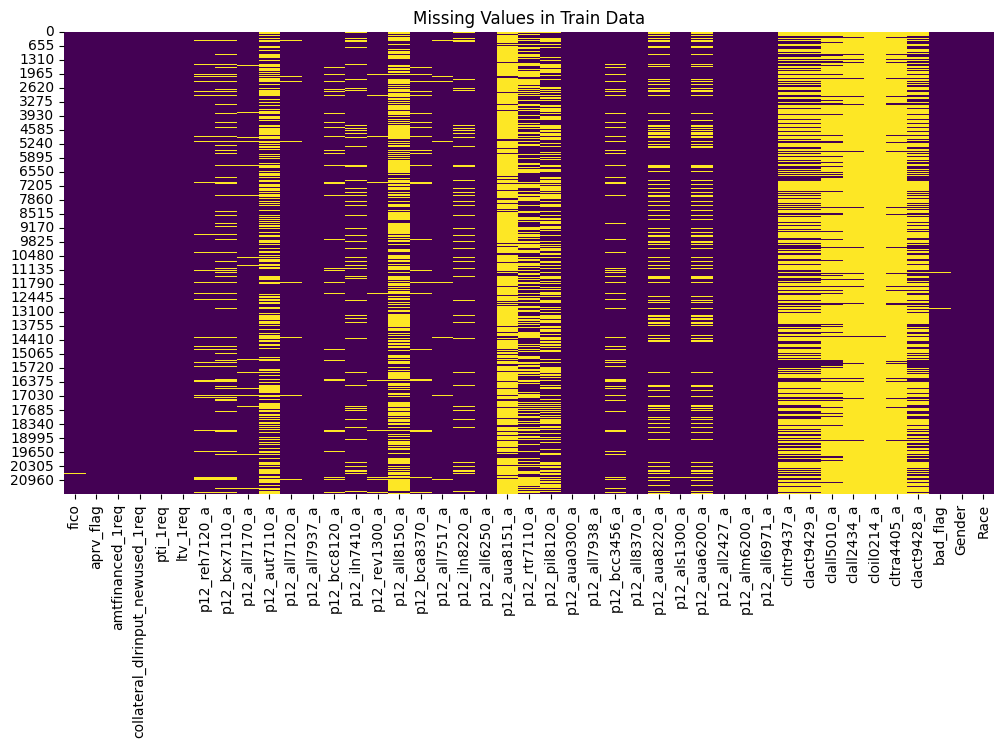

In [9]:
# Visualizing missing data
plt.figure(figsize=(12, 6))
sns.heatmap(df_train.isnull(), cmap='viridis', cbar=False)
plt.title("Missing Values in Train Data")
plt.show()

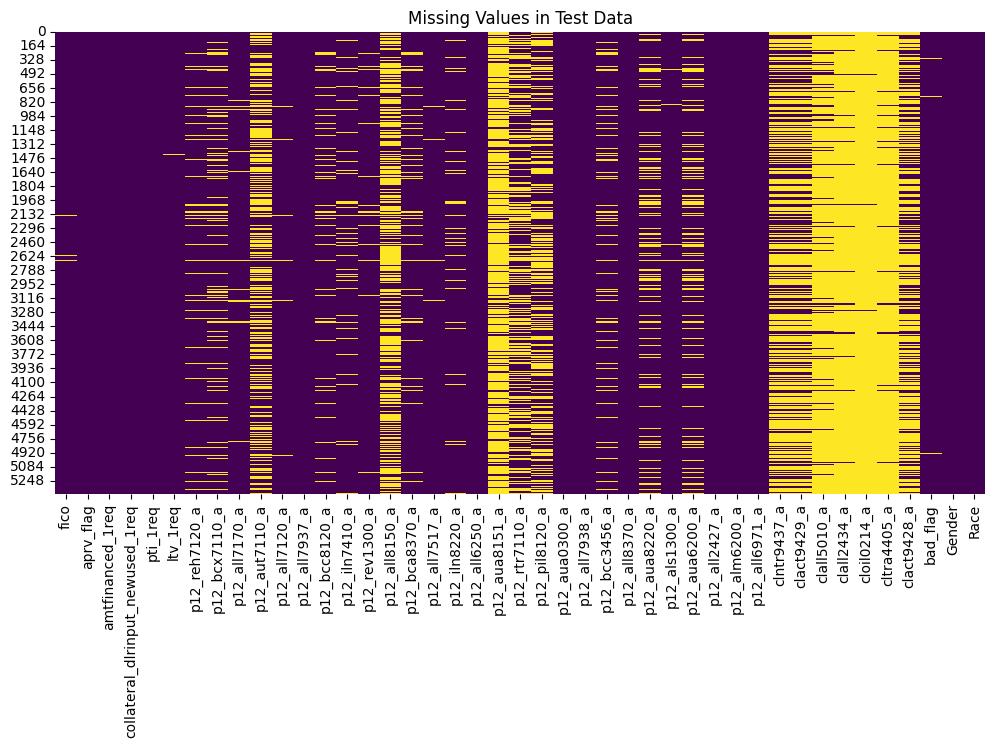

In [10]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_test.isnull(), cmap='viridis', cbar=False)
plt.title("Missing Values in Test Data")
plt.show()

In [12]:
# Plot the percentage of the missing data in train_df
def missing_data_plot(df_data):
    missing_percent_train = ((df_data.isnull().sum()/len(df_data))*100).round(2)
    plt.figure(figsize=(16, 6))
    missing_percent_train.plot(kind='bar')
    plt.title('Percentage of Missing Values per Feature')
    plt.xlabel('Features')
    plt.ylabel('Percentage')
    plt.xticks(rotation=60)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Annotate each bar with percentage
    for i, v in enumerate(missing_percent_train):
        plt.text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom', fontsize=10)
    plt.show()

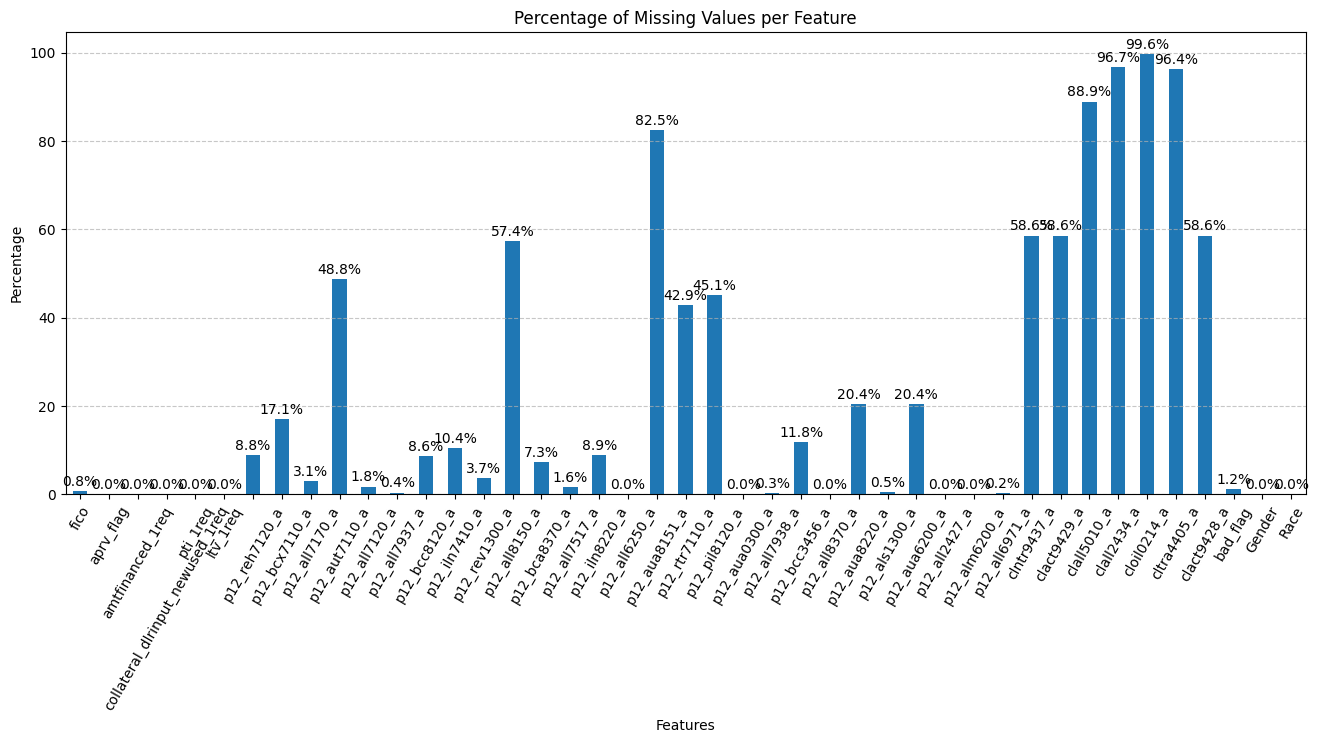

In [13]:
missing_data_plot(df_train)

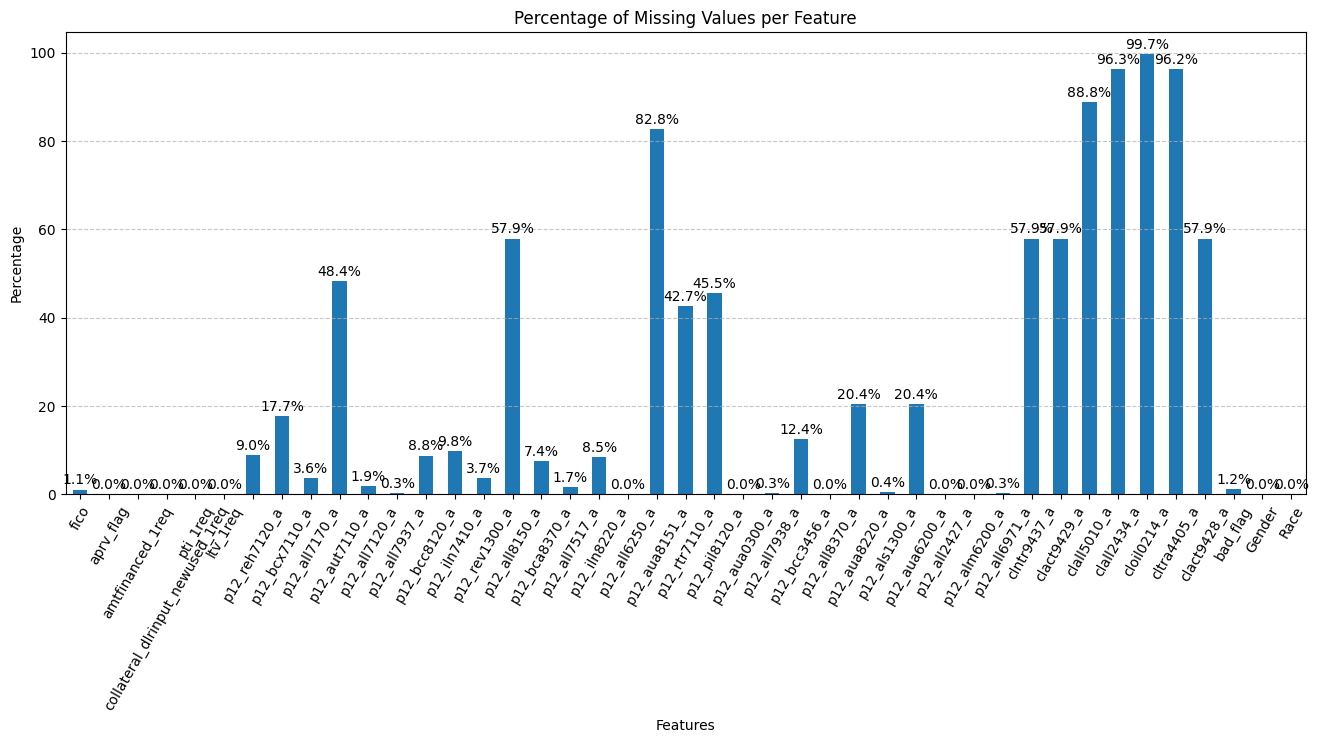

In [14]:
missing_data_plot(df_test)

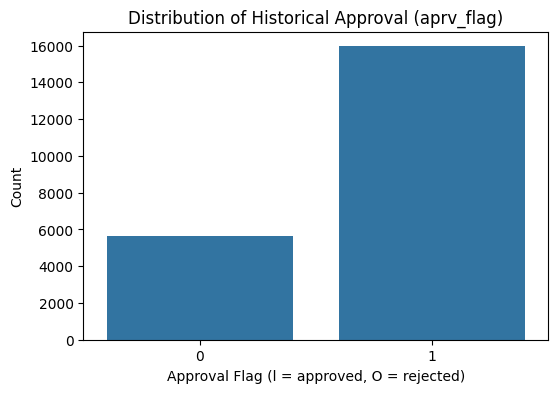

In [15]:
# Distribution of approval decisions
plt.figure(figsize=(6,4))
sns.countplot(x='aprv_flag', data=df_train)
plt.title('Distribution of Historical Approval (aprv_flag)')
plt.xlabel('Approval Flag (l = approved, O = rejected)')
plt.ylabel('Count')
plt.show()

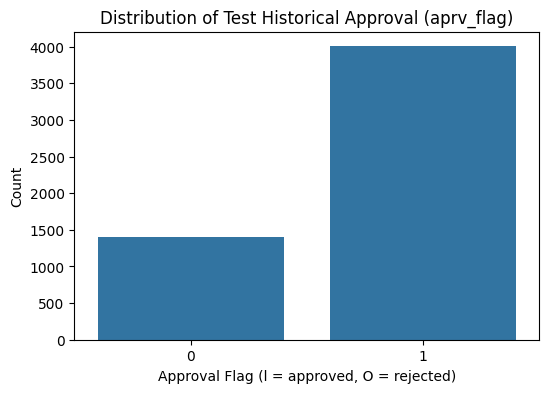

In [16]:
# Distribution of approval decisions
plt.figure(figsize=(6,4))
sns.countplot(x='aprv_flag', data=df_test)
plt.title('Distribution of Test Historical Approval (aprv_flag)')
plt.xlabel('Approval Flag (l = approved, O = rejected)')
plt.ylabel('Count')
plt.show()

In [17]:
def bar_char(df_data):
    gender_counts= df_data['Gender'].value_counts()
    gender_percent = (gender_counts/gender_counts.sum())*100
    plt.figure(figsize=(6,7))
    gender_percent.plot(kind='bar')
    plt.title('Gender Distribution')
    plt.xlabel('Gender')
    plt.ylabel('Percentage')
    plt.xticks(rotation=90)
    plt.grid(axis='y',linestyle= '--', alpha=0.4)

    # Annotate each bar with number
    for i, perc in enumerate(gender_percent):
        plt.text(i, perc+1, f'{perc:.2f}%', ha='center', va='bottom', fontsize=10) 
    plt.show()

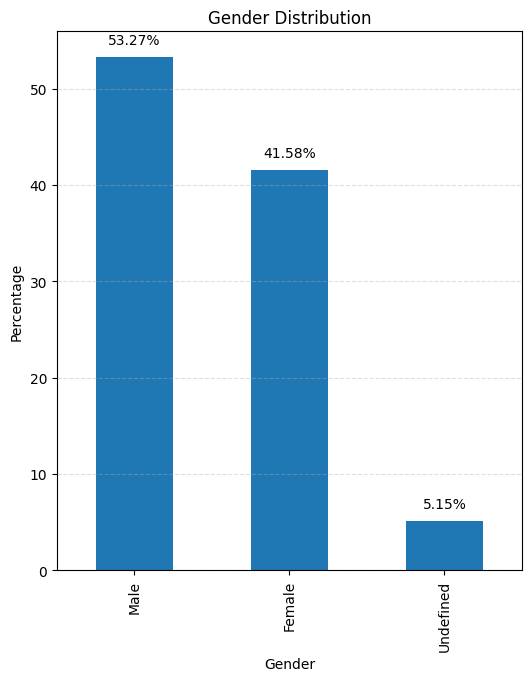

In [18]:
bar_char(df_train)

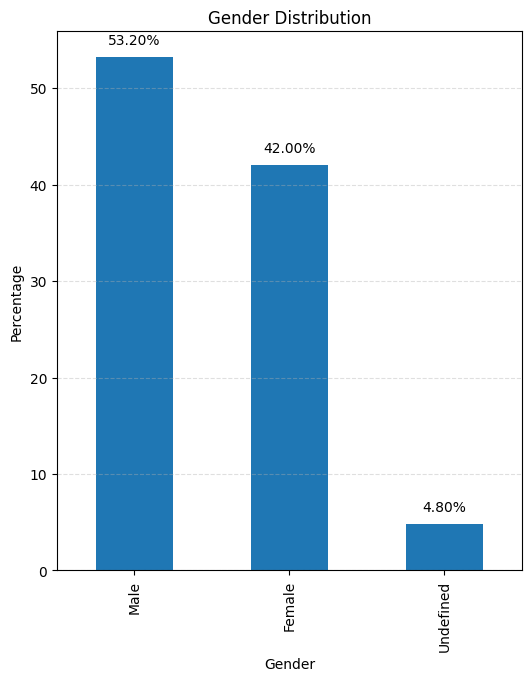

In [19]:
bar_char(df_test)

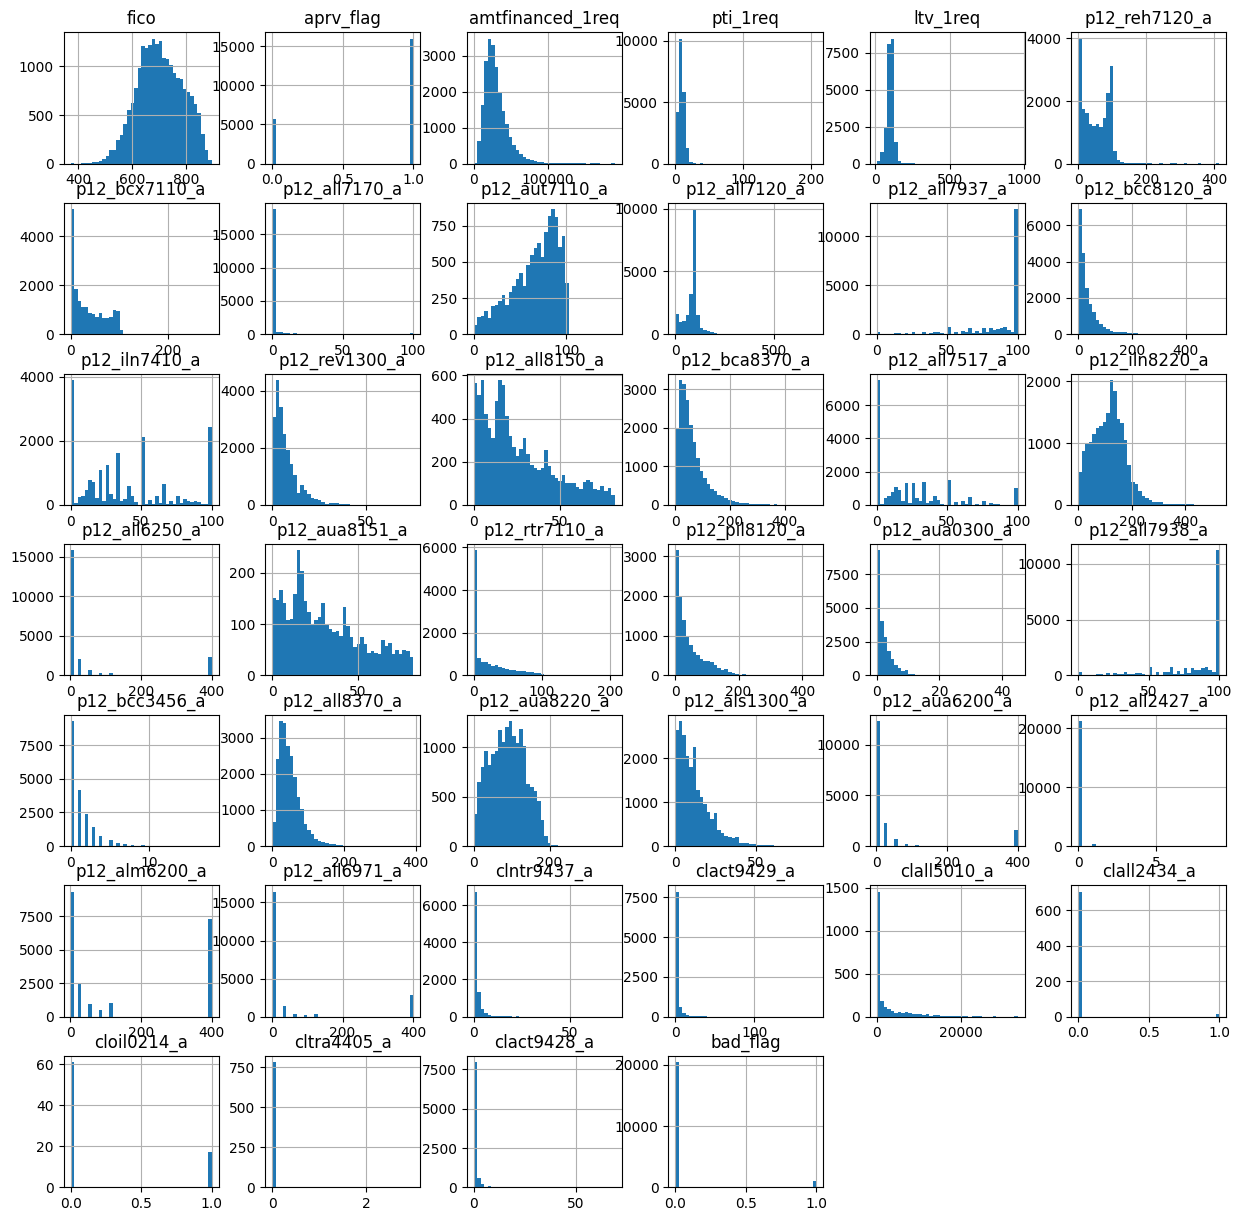

In [21]:
df_train.hist(bins=40 , figsize=(15,15))
plt.show()